In [29]:
from IPython.core.display import HTML ; HTML(open("./custom.css", "r").read()) # notebook style

<h1 align="center" style="font-size:40px">Analyse des performances du turbofan</h1><br>

## Importation des librairies et du cycle du turbofan

<h3>Nous avons besoin de :</h3>
<ul>
    <li>Numpy</li>
    <li>Matplotlib</li>
    <li>Cycle du Turbofan</li>
</ul>    

In [36]:
sys.setdefaultencoding('utf-8')
import numpy as np
import hades.engine.Cycle_Turbofan as cycle
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
#%xmode verbose

## Plages de variation

In [37]:
# gas properties
g      = cycle.Gaz()
g_fuel = cycle.Gaz(1.33, 291.6, 42800e3)
#
# turbo fan components range
tab_Bpr = np.arange(1,16,0.2)
tab_m = np.arange(0.2,0.8,0.05)
tab_Tt4 = np.arange(900,2500,10)
tab_Opr = np.arange(2,55,0.5)

## Design en poussée spécifique et rendement à $T_{i4}$ fixé

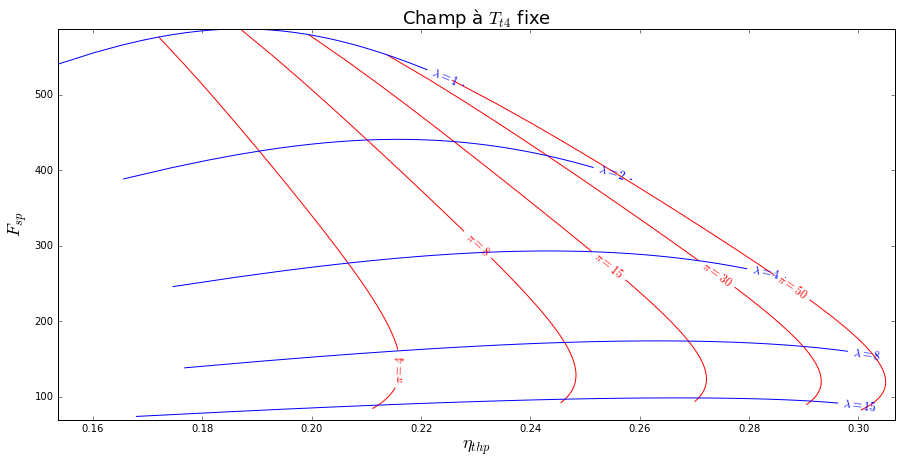

In [38]:
AllBpr, AllOpr = np.meshgrid(tab_Bpr, tab_Opr)
turbofan = cycle.cycle_taux_fan_calcule(AllBpr, AllOpr, 1600., 230., g, g_fuel, .58)
turbofan.calculs_5_to_9()

# F_spe, mk_spe, eta_th, eta_prop, eta, pi_f = turbofan.F_spe, mk_spe, eta_th, eta_prop, eta, pi_f
plt.figure(1)
plot1 = plt.contour(turbofan.eta, turbofan.F_spe, AllOpr, levels=[4, 8, 15, 30, 50], colors="r")
plot2 = plt.contour(turbofan.eta, turbofan.F_spe, AllBpr, levels=[1, 2, 4, 8, 15], colors="b")
#plt.axis([5, 50, 0, 0.55])
plt.xlabel(r'$\eta_{thp}$', fontsize=18)
plt.ylabel(r"$F_{sp}$", fontsize=18)
plt.title(u"Champ à $T_{t4}$ fixe", fontsize=18)
plt.clabel(plot1, inline=True, fontsize=12, fmt=r'$\pi=%.0f$')
plt.clabel(plot2, inline=True, fontsize=12, fmt=r'$\lambda=%.0f$')
plt.show()